In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
np.random.seed(132)
from functools import lru_cache

import sys

CODE_PATH = '../code'

sys.path.append(CODE_PATH)
import functions

from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_iris, load_boston, load_breast_cancer, load_wine, load_digits
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

%pylab inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


/home/basil/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



# Конструируем модельную задачу

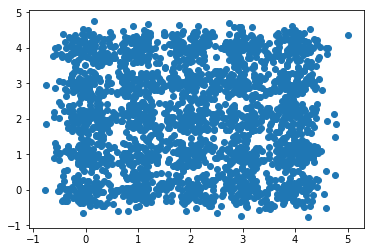

In [3]:
np.random.seed(100)
cluster_objects = 100
num_clusters = 5

mean = np.zeros(2)
cov = np.eye(2) * 0.07
X = []

y = np.zeros(num_clusters**2*cluster_objects)

for i in np.linspace(0, num_clusters-1, num_clusters):
    for j in np.linspace(0, num_clusters-1, num_clusters):
        mean = np.array([i, j])
        X_cluster = np.random.multivariate_normal(mean, cov, cluster_objects)
        X.append(X_cluster)
X = np.vstack(X)
scatter(X[:,0], X[:,1], )

In [4]:
# объединяем классы
classes_in_cluster = 5

order = np.array(range(num_clusters**2))
np.random.shuffle(order)
splits = np.split(order, 5)
for i, split in enumerate(splits):
    for item in split:
        y[item*cluster_objects:(item+1)*cluster_objects] = i

In [ ]:
print(y)
plot(y)

In [ ]:
figsize(8, 8)
scatter(X[:,0], X[:,1], c=y, )

In [ ]:
# модельная задача на 12 классов
colors = []
cs = []

# np.random.seed(100)
cluster_objects = 100
num_clusters = 5

mean = np.zeros(2)
cov = np.eye(2) * 0.07
X = []

y = np.zeros(num_clusters**2*cluster_objects)

for i in np.linspace(0, 4-1, 4):
    for j in np.linspace(0, 5-1, 5):
        c = np.random.randint(0, 12)
        mean = np.array([i, j])
        X_cluster = np.random.multivariate_normal(mean, cov, cluster_objects)
        X.append(X_cluster)
        colors += [c]*cluster_objects
        cs.append(c)
X = np.vstack(X)
print(cs)
scatter(X[:,0], X[:,1], c=colors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata

# Load a multi-label dataset
yeast = fetch_mldata('yeast')
X = yeast['data']
Y = yeast['target'].transpose().toarray()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [ ]:
yeast['target']

In [ ]:
df = pd.read_csv('../yeast.data.txt', sep=';', header=None)
X = df.values[:,1:-1]
y = pd.factorize(df[9])[0]
y

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

In [ ]:
scatter(tsne_results[:,0], tsne_results[:,1], c=y)
